<a href="https://colab.research.google.com/github/Nagmashaik123/Section203-Group06/blob/main/Vacc_Dose_TM_Bi-gram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing the processed vaccination file
import pandas as pd
df=pd.read_csv(r"ProcessedCovidVaccineReact.csv")
df

,TweetDate,TweetText,CleanedTweet,TweetAuthor,TweetLocation,AllHashtags,Country
0,2021-03-17 23:59:34,The only way #COVID19 can mutate with variants...,way mutate variants virus replicate hosts peop...,kemsunde,Unknown,"['COVID19', 'CovidVaccine', 'GetTheFactsGetThe...",Unknown
1,2021-03-17 23:59:20,I've now officially had my 1st dose of the #Co...,ive officially dose covidvaccine definitely wo...,ManeckiN,The Wild Western Wastes,"['CovidVaccine', 'COVID19', 'PfizerVaccine', '...",Unknown
2,2021-03-17 23:58:31,@hendopolis Imagine if the #Brexit referendum ...,hendopolis imagine brexit referendum held secr...,raymasseytweets,England,"['Brexit', 'EU', 'TrueColours', 'Impfstoff', '...",United Kingdom
3,2021-03-17 23:58:03,@EICostheta @RicBarraArch1 @insiders Yep. The ...,eicostheta insiders yep liarsnparasites narrow...,MikeFitzAU,Mudjimba,"['LiarsNParasites', 'CovidVaccine']",Australia
4,2021-03-17 23:57:37,This sounds like an important topic for @NickS...,sounds like important topic nicksawyermd tnich...,stephjantzen,Greater Sacramento,"['FiresideChat', 'CovidVaccine']",Brazil
...,...,...,...,...,...,...,...
352017,2021-04-03 18:39:22,RT @citymississauga: #COVID19Vaccine Booking T...,rt citymississauga booking tip wondering frien...,AnwarKnight,Toronto,['COVID19Vaccine'],Canada
352018,2021-04-03 18:39:13,RT @iamwandasykes: We’re fully vaccinated and ...,rt iamwandasykes fully vaccinated rejuvenated ...,HarrisTryonLab,Dallas,[],United States
352019,2021-04-03 18:39:04,#CovidVaccine and Weird Thoughts by Diane Burt...,covidvaccine weird thoughts diane burton https...,dla1950,http://,['CovidVaccine'],Japan
352020,2021-04-03 18:38:54,RT @ProfPatOConnor: It’s nice to know that the...,rt profpatoconnor nice know ambitions ceo hse ...,Pepeb72,Cork,[],Ireland


In [2]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all
       | 
       | Downloading package abc to /root/nltk_data...
       |   Unzipping corpora/abc.zip.
       | Downloading package alpino to /root/nltk_data...
       |   Unzipping corpora/alpino.zip.
       | Downloading package biocreative_ppi to /root/nltk_data...
       |   Unzipping corpora/biocreative_ppi.zip.
       | Downloading package brown to /root/nltk_data...
       |   Unzipping corpora/brown.zip.
       | Downloading package brown_tei to /root/nltk_data...
       |   Unzipping corpora/brown_tei.zip.
       | Downloading package cess_cat to /root/nltk_data...
       |   Unzipping corpora/cess_cat.zip.
       | Downloading package cess_esp to /root/nltk_data...
 

True

In [3]:
# Importing packages
import pandas as pd
from gensim.models import Phrases
from gensim import corpora, models
from nltk.tokenize import word_tokenize 
tokens=[]
bigram = Phrases()

# Iterating through cleaned tweets
for a in df["CleanedTweet"]:
  try:
    if pd.isnull(a) or float(a):
      tokens.append("")
  except ValueError:
# Converting into tokens   
      tokens.append(word_tokenize(a))

# Calling bi-grams API to fetch the bi-grams
bigram_data = models.Phrases(tokens, min_count=30)
bigrams_mod_val = models.phrases.Phraser(bigram_data)




In [4]:

import operator
dictionary={}
count=0
bigrams=[]
# Creating the dictionary as key value pairs for each bi and its corresponding frequency count
for id in range(len(tokens)):
    for token in bigrams_mod_val[tokens[id]]:
        if '_' in token:
          bigrams.append(token)
          tokens[id].append(token)
# Setting key value dictionary           
for keyVal in bigrams:
  if keyVal in dictionary:
    dictionary[keyVal]+=1
  else:
    dictionary[keyVal]=1

# Returns the final list of bigram Map.    
data= sorted(dictionary.items(),key=operator.itemgetter(1),reverse=True)


In [6]:
data[:30000]

[('first_dose', 5608),
 ('fully_vaccinated', 5521),
 ('anniversary_im', 4530),
 ('see_safe', 4528),
 ('ichaydon_year', 4523),
 ('ago_tried', 4523),
 ('two_doses', 4309),
 ('mrna_vaccine', 4256),
 ('vaccines_pfizer', 4130),
 ('vaccinated_httpstco', 4126),
 ('moderna_vaccinessavelives', 4121),
 ('side_effects', 4102),
 ('hotvickkrishna_need', 4092),
 ('second_dose', 3832),
 ('life_saving', 3428),
 ('slots_ca', 3336),
 ('trump_would', 3327),
 ('would_imagine', 3320),
 ('davidmweissman_never', 3319),
 ('leaving_maga', 3319),
 ('ending_support', 3319),
 ('million_doses', 2620),
 ('cvs_locations', 2329),
 ('blood_clots', 2208),
 ('jab_job', 2167),
 ('companies_also', 2069),
 ('berniespofforth_implementing', 2068),
 ('policy_new', 2068),
 ('zealand_pm', 2068),
 ('outlines_private', 2068),
 ('obliged_ens', 2068),
 ('appointments_available', 2062),
 ('johnson_amp', 1967),
 ('rite_aids', 1949),
 ('emas_safety', 1947),
 ('donut_krispykreme', 1944),
 ('committee_prac', 1939),
 ('fucking_year', 192

In [14]:
labels = ['Bigram_Words', 'Frequency']
df = pd.DataFrame.from_records(data[:30000], columns=labels)
df

,Bigram_Words,Frequency
0,first_dose,5608
1,fully_vaccinated,5521
2,anniversary_im,4530
3,see_safe,4528
4,ichaydon_year,4523
...,...,...
6315,proud_guy,1
6316,lungs_lungs,1
6317,fyi_hamont,1
6318,sames_warehouse,1


In [15]:
# Importing libraries for visual word cloud map

import numpy as np
from PIL import Image
import pandas as pd
from os import path
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt



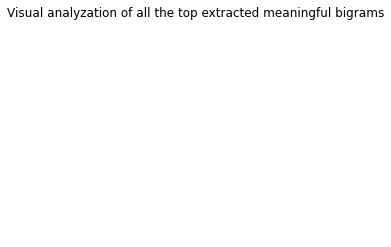

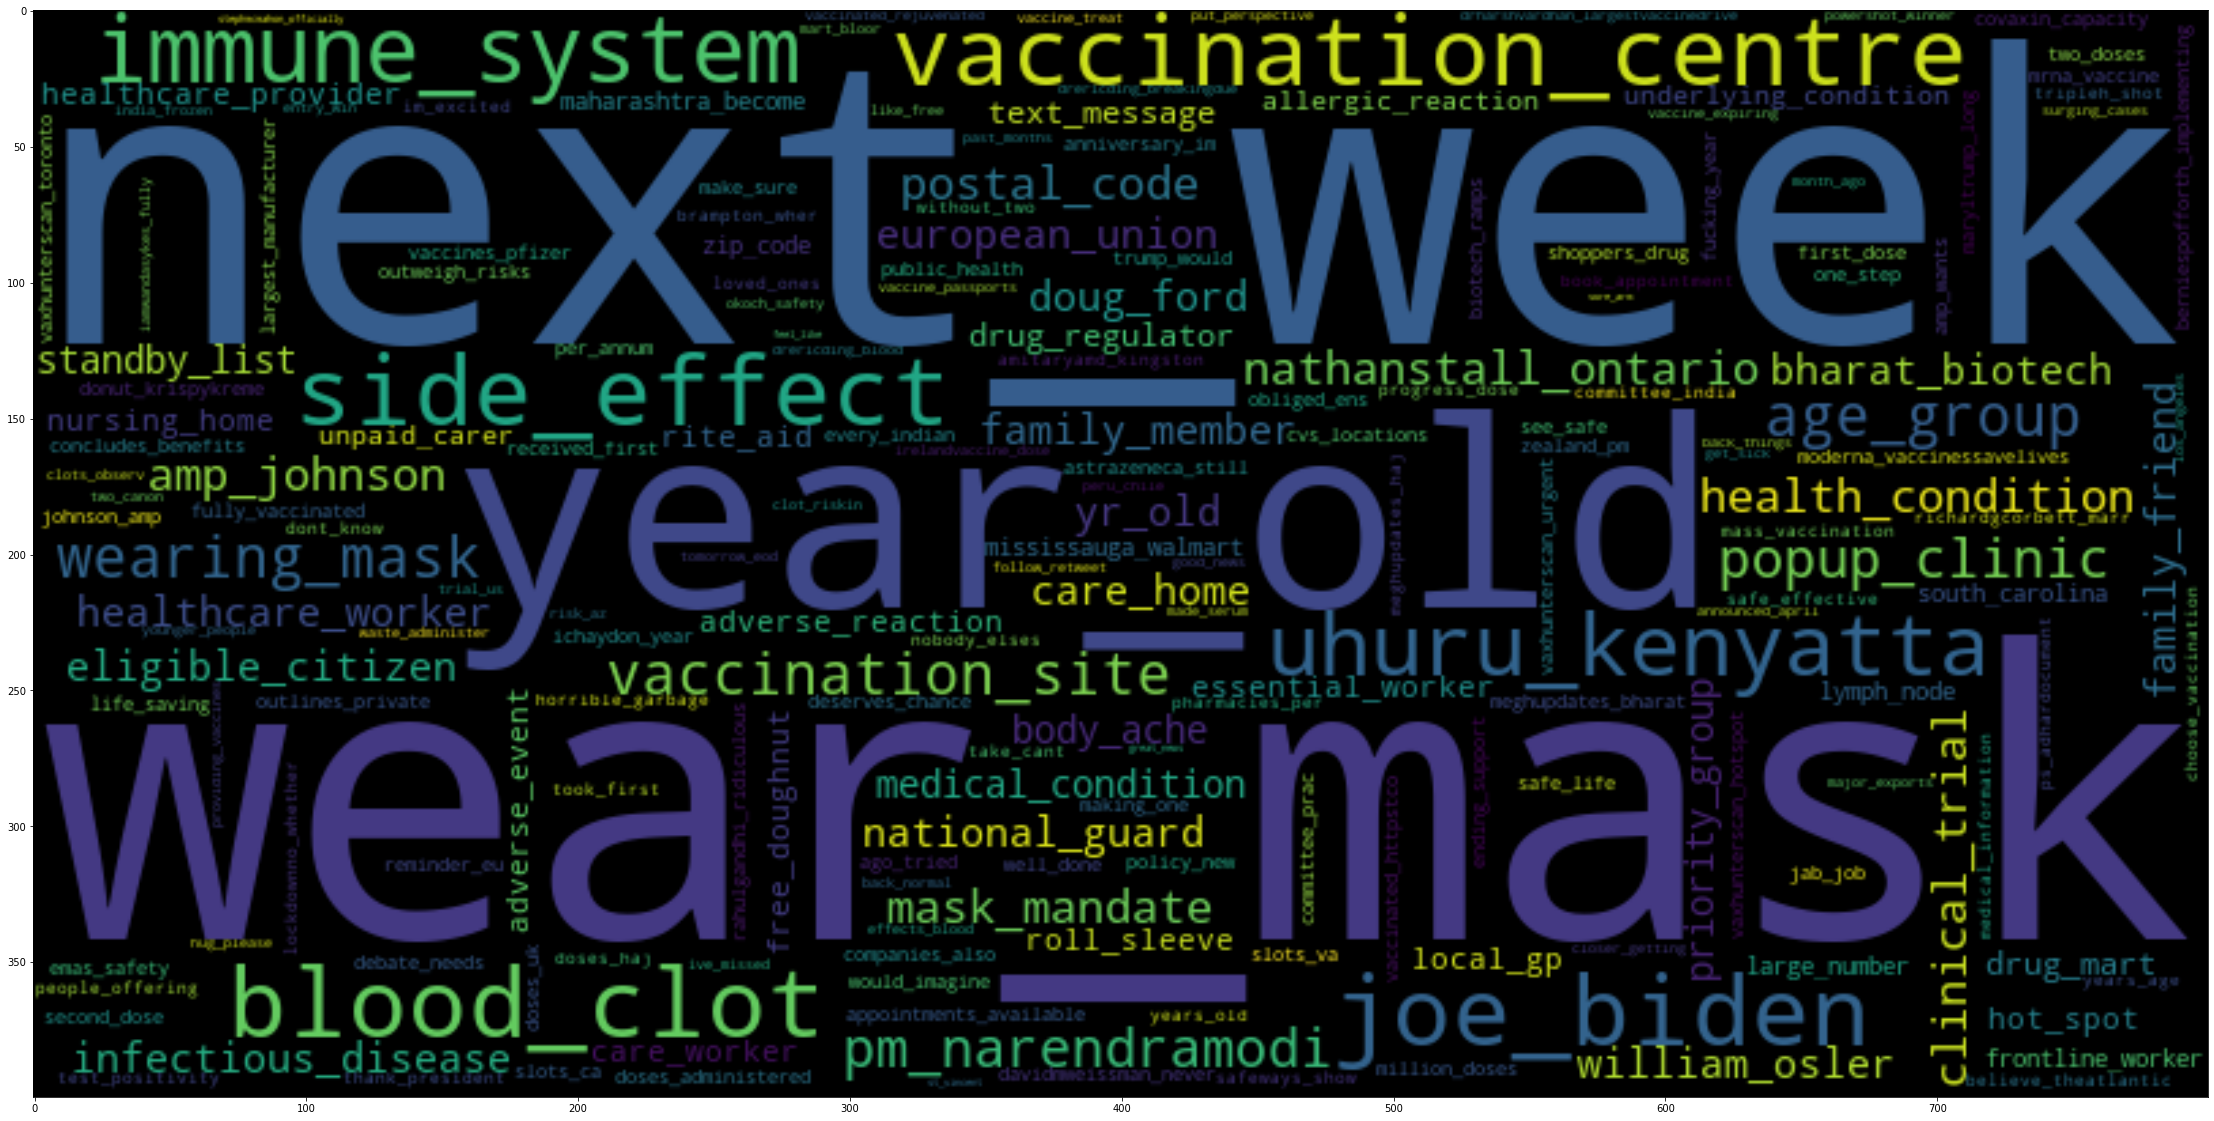

In [16]:
# Python program to generate WordCloud for column Bigrams

textData = " ".join(review for review in df.Bigram_Words.astype(str))

# removing stopwords that we want to exclude
stopwords = set(STOPWORDS)
stopwords.update(["hotvickkrishna_need","leaving_maga","cant_wait"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="black", width=800, height=400).generate(textData)

# Display the generated image matplotlib way:
plt.axis("off")
plt.title("Visual analyzation of all the top extracted meaningful bigrams")
plt.figure( figsize=(40,20))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

In [17]:
# Analysing the bi-grams and manually reading the bi-grams and categorizing them as First Dose , Second Dose and yet to be vaccinated
First_Dose =[ 'first_dose', 'got_first','receives_first','took_first','due_second','single_dose','wearamask_firstdosedone','doses_administered','administering_doses'] # First Dose declaring manually for analysis
Second_Dose =['received_second','second_dose','two_doses'] # Second Dose declaring manually for analysis
Appointments_Scheduled = ['schedule_appointment','appointment_saturday','appointments_newly','appointment_online'] # Scheduled appointments declaring manually for analysis

First_Dose_Count   = df.loc[df['Bigram_Words'].isin(First_Dose), 'Frequency'].sum()
Second_Dose_Count  = df.loc[df['Bigram_Words'].isin(Second_Dose), 'Frequency'].sum()
Appointments_Count = df.loc[df['Bigram_Words'].isin(Appointments_Scheduled), 'Frequency'].sum()

# initialize list of lists
Vaccination_Doses = [['First Dose', First_Dose_Count], ['Second Dose', Second_Dose_Count], ['Appointments Scheduled', Appointments_Count]]
  
# Create the pandas DataFrame
df = pd.DataFrame(Vaccination_Doses, columns = ['Vaccination_Doses', 'Population_Count'])
df['percent_count'] = (df['Population_Count'] / df['Population_Count'].sum()) * 100
percentCount= df['percent_count'].tolist()  
vaccinationDoses= df['Vaccination_Doses'].tolist()
# print dataframe.
df


,Vaccination_Doses,Population_Count,percent_count
0,First Dose,8538,48.945196
1,Second Dose,8141,46.669342
2,Appointments Scheduled,765,4.385462


Text(0, 0.5, 'Percentage of dosage count')

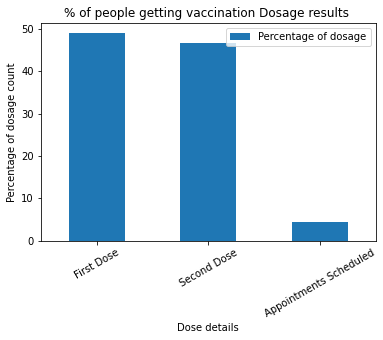

In [18]:
from matplotlib import pyplot as plt
# Create a sample dataframe with an text index


plotdata = pd.DataFrame(
    {"Percentage of dosage": percentCount}, 
    index= vaccinationDoses)
# Plot a bar chart
plotdata.plot(kind="bar")

plotdata['Percentage of dosage'].plot(kind="bar", title="")
# Rotate the x-labels by 30 degrees, and keep the text aligned horizontally
plt.xticks(rotation=30, horizontalalignment="center")
plt.title("% of people getting vaccination Dosage results ")
plt.xlabel("Dose details")
plt.ylabel("Percentage of dosage count")

